# Bagging: Demostración de reducción de varianza

## Intuición:

La idea de un ensemble de tipo bagging es aprovechar la diversidad entre modelos individuales (siendo estos del mismo tipo) que tienen alta varianza. Al promediar sus predicciones, los errores independientes de cada modelo (modelos base) tienden a cancelarse, mientras que las predicciones correctas se refuerzan. Esto permite que el ensemble tenga una predicción más estable y cercana a los valores reales que cada modelo por separado.

## Demostración matemática:

La idea es demostrar matemáticamente que el predictor promedio de Bootstrap Aggregating tiene menor varianza que cada modelo base individual.

Fijamos un punto $x$.

Cada modelo entrenado con bootstrap produce una predicción aleatoria:

$$\hat f_1(x), \hat f_2(x), \dots, \hat f_B(x)$$

Son variables aleatorias porque dependen del dataset bootstrap.



Definimos el predictor bagging:

$$\hat f_{bag}(x) = \frac{1}{B}\sum_{b=1}^{B}\hat f_b(x)$$

Queremos calcular:

$$\text{Var}(\hat f_{bag}(x))$$





### Varianza de una combinación lineal

La varianza de una combinación lineal de variables aleatorias se puede expresar como:

$$\text{Var}\Big(\sum_{i=1}^{B} a_i X_i \Big)
=
\underbrace{\sum_{i=1}^{B} a_i^2 \text{Var}(X_i)}_{\text{(1) varianzas individuales}}
+
\underbrace{\sum_{i \ne j} a_i a_j \text{Cov}(X_i,X_j)}_{\text{(2) covarianzas}}$$

<details>
<summary>Desglose conceptual</summary>

1.	Varianzas individuales: $\sum a_i^2 \text{Var}(X_i)$ mide la variabilidad propia de cada variable por separado.
Si las variables fueran independientes, solo existiría este término.
2.	Término de interacción (covarianzas): $\sum_{i\ne j} a_i a_j \text{Cov}(X_i,X_j)$ mide cuánto “se mueven juntas” las variables.

- Covarianza positiva → aumenta la varianza total.
- Covarianza negativa → puede reducir la varianza total.
- Covarianza cero → no contribuye a la interacción.

</details>

### Aplicación al ensemble Bagging

En bagging, el ensemble es un promedio de B modelos:

$$\hat f_{bag} = \frac{1}{B} \sum_{i=1}^B \hat f_i$$

Aquí cada coeficiente es:

$$a_i = \frac{1}{B}$$

Sustituyendo en la fórmula general:

$$\text{Var}(\hat f_{bag})
= \sum_{i=1}^B \left(\frac{1}{B}\right)^2 \text{Var}(\hat f_i) + \sum_{i\ne j} \frac{1}{B} \frac{1}{B} \text{Cov}(\hat f_i, \hat f_j)
= \frac{1}{B^2} \left( \sum_{i=1}^B \text{Var}(\hat f_i) + \sum_{i\ne j} \text{Cov}(\hat f_i, \hat f_j) \right)$$

<details>
<summary>Desglose conceptual en Bagging</summary>


1.	Variabilidad individual: Mide cuánto varía cada modelo por separado. Al promediar, esta componente se reduce aproximadamente por un factor $1/B$:

$$\sum_{i=1}^B a_i^2 \text{Var}(\hat f_i) = \frac{1}{B^2} \sum_{i=1}^B \text{Var}(\hat f_i)$$

2.	Correlación entre modelos: Mide cuánto se parecen los errores de los modelos entre sí. Esta componente no se reduce automáticamente al promediar:

$$\sum_{i\ne j} a_i a_j \text{Cov}(\hat f_i, \hat f_j) = \frac{1}{B^2} \sum_{i\ne j} \text{Cov}(\hat f_i, \hat f_j)$$

Consecuencias:
- Si los modelos son poco correlacionados → gran reducción de varianza.
- Si son muy correlacionados → la reducción es limitada.

> Nota sobre el factor $1/B^2$: Aparece porque cada modelo se pondera con 1/B en el promedio, y la varianza de un múltiplo se escala como el cuadrado del múltiplo:
> $$\text{Var}(cX) = c^2 \text{Var}(X).$$
> Por eso tanto los términos de varianza individual como de covarianza se multiplican por $ 1/B^2$.

</details>

#### Simplificando la expresión bajo supuestos de simetria 

Para poder simplificar sin perder generalidad conceptual, hacemos el supuesto estándar de análisis de bagging:
1.	Todos los modelos tienen la misma varianza:

$$\text{Var}(\hat f_b) = \sigma^2$$

2.	La covarianza entre cualquier par distinto es constante:

$$\text{Cov}(\hat f_i,\hat f_j) = \rho \sigma^2$$

Este no es un truco matemático; es un supuesto de homogeneidad razonable porque todos los modelos provienen del mismo algoritmo con bootstrap.

##### Sustituimos en la expresión


Sabemos que:
- Hay $B$ términos de varianza.
- Hay $B(B-1)$ términos de covarianza (porque $i \ne j$).

Entonces:

$$\text{Var}(\hat f_{bag})
=
\frac{1}{B^2}
\left(
B\sigma^2
+
B(B-1)\rho\sigma^2
\right)$$

Factorizamos:

$$=
\frac{\sigma^2}{B^2}
\left(
B + B(B-1)\rho
\right)$$

Sacamos B:

$$=
\frac{\sigma^2}{B}
\left(
1 + (B-1)\rho
\right)
\frac{1}{B}$$

Simplificando correctamente:

$$=
\sigma^2
\left(
\rho + \frac{1-\rho}{B}
\right)$$

Resultado final (demostración cerrada)

$$\boxed{
\text{Var}(\hat f_{bag})
=
\sigma^2
\left(
\rho + \frac{1-\rho}{B}
\right)
}$$

<details>

<summary>Desglose</summary>

Partimos del resultado demostrado:

$$\text{Var}(\hat f_{bag})
=
\sigma^2
\left(
\rho + \frac{1-\rho}{B}
\right)$$

Podemos reescribirlo como:

$$\text{Var}(\hat f_{bag})
=
\sigma^2 \rho
+
\frac{\sigma^2(1-\rho)}{B}$$

Esto permite una interpretación estructural clara:
- Parte correlacionada: $\sigma^2 \rho$
- Parte no correlacionada: $\sigma^2 (1-\rho)$

El promedio solo divide por B la parte no correlacionada:

$$\sigma^2 \rho
+
\frac{\sigma^2(1-\rho)}{B}$$

Implicaciones
1.	La varianza del ensemble depende de la estructura de covarianza entre modelos.
2.	La reducción ocurre únicamente sobre la componente no correlacionada.
3.	Cuando $B \to \infty$:

$$\text{Var}(\hat f_{bag}) \to \sigma^2 \rho$$

Existe entonces un límite inferior determinado por la correlación.

</details>

#### Conclusión final:

En otras palabras:

La reducción de varianza no depende solo del número de modelos,
depende fundamentalmente de cómo interactúan entre sí.

Bajo el supuesto de:
- varianzas similares,
- correlación promedio constante,

la varianza se descompone en:

$$\text{Var total}
=
\text{Componente individual}
+
\text{Componente de interacción}$$

Bagging reduce la componente individual por un factor 1/B,
pero la componente de interacción solo disminuye si se reduce la correlación. Por eso métodos como
Random Forest
introducen aleatoriedad adicional en las variables para disminuir la covarianza entre modelos y así bajar el límite inferior de varianza.

---

## Demostración en código:

In [325]:
import numpy as np
import pandas as pd

In [326]:
import matplotlib.pyplot as plt
import seaborn as sns

In [327]:
from sklearn.datasets import make_regression

In [328]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.decomposition import PCA

In [329]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

In [330]:
# Fijamos semilla
np.random.seed(42)

### Lectura del dataset

In [331]:
X, y = make_regression(
    n_samples=500,
    n_features=10,
    noise=20,
    random_state=42
)

y = y + 10 * np.sin(X[:, 0])

#### Separación en entrenamiento y testeo

In [332]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

#### Selección de punto a evaluar:

In [333]:
# Punto fijo para análisis de varianza sobre una sola muestra
x0 = X_test[0].reshape(1, -1)

#### Reducción de dimensionalidad

No se aplicara para no afectar el la reducción de varianza por parte de RandomForestRegressor, que como vimos mejora a BaggingRegressor al incorporar una seleccion aleatoria de n features, aumentando la diversidad y reduciendo la correlación entre modelos base.

In [334]:
#pca = PCA(n_components=8, random_state=42)

In [335]:
#X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)
#x0 = pca.transform(x0)

### Modelado

In [336]:
B = 100          # número de modelos dentro del ensamble
R = 200          # repeticiones para estimar varianzaB = 200

In [348]:
def varianza_en_predicciones(predicciones_x0:list, y_test, y_preds:list, etiquetas:list, palette_dict:dict={'Árbol':'Red', 'Bagging':'Blue', 'Random Forest':'Green'}):
    """
    Plotea reducción de varianza puntual (boxplot en x0)
    y comparación valores reales vs predichos (scatter) usando Seaborn
    
    predicciones_x0: lista de listas/arrays, predicciones de cada modelo en x0 (para boxplot)
    y_test: valores reales del test
    y_preds: lista de arrays de predicciones de cada modelo sobre X_test
    etiquetas: nombres de los modelos
    palette_dict: diccionario opcional con colores por etiqueta, e.g. {'Árbol':'red', 'Bagging':'blue'}
    """
    # --- Preparar DataFrame para boxplot ---
    box_data = pd.DataFrame({label: pred for label, pred in zip(etiquetas, predicciones_x0)})
    
    # --- Preparar DataFrame para scatter ---
    scatter_data = pd.DataFrame()
    for label, y_pred in zip(etiquetas, y_preds):
        temp = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred, 'Modelo': label})
        scatter_data = pd.concat([scatter_data, temp], axis=0)
    
    # --- Plot ---
    fig, axes = plt.subplots(1, 2, figsize=(14,6))
    
    # Boxplot de varianza puntual
    if palette_dict:
        sns.boxplot(data=box_data, ax=axes[0], palette=palette_dict)
    else:
        sns.boxplot(data=box_data, ax=axes[0], palette="Set2")
        
    axes[0].set_ylabel('Predicción en x0')
    axes[0].set_title('Reducción de varianza puntual en x0')
    
    # Scatter predicciones vs reales
    if palette_dict:
        sns.scatterplot(data=scatter_data, x='y_test', y='y_pred', hue='Modelo', alpha=0.6, ax=axes[1], palette=palette_dict)
    else:
        sns.scatterplot(data=scatter_data, x='y_test', y='y_pred', hue='Modelo', alpha=0.6, ax=axes[1], palette="Set2")
    
    # Línea de referencia
    min_val, max_val = y_test.min(), y_test.max()
    axes[1].plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Perfecto')
    
    axes[1].set_xlabel('Valores reales')
    axes[1].set_ylabel('Predicciones')
    axes[1].set_title('Comparación predicciones vs valores reales')
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()

#### Árbol CON bootstrap (pero aún sin ensemble):

Demostración puntual

In [338]:
f_tree = []
for _ in range(R):
    X_bs, y_bs = resample(X_train, y_train)
    tree = DecisionTreeRegressor()
    tree.fit(X_bs, y_bs)
    f_tree.append(tree.predict(x0)[0])
var_tree = np.var(f_tree, ddof=1)

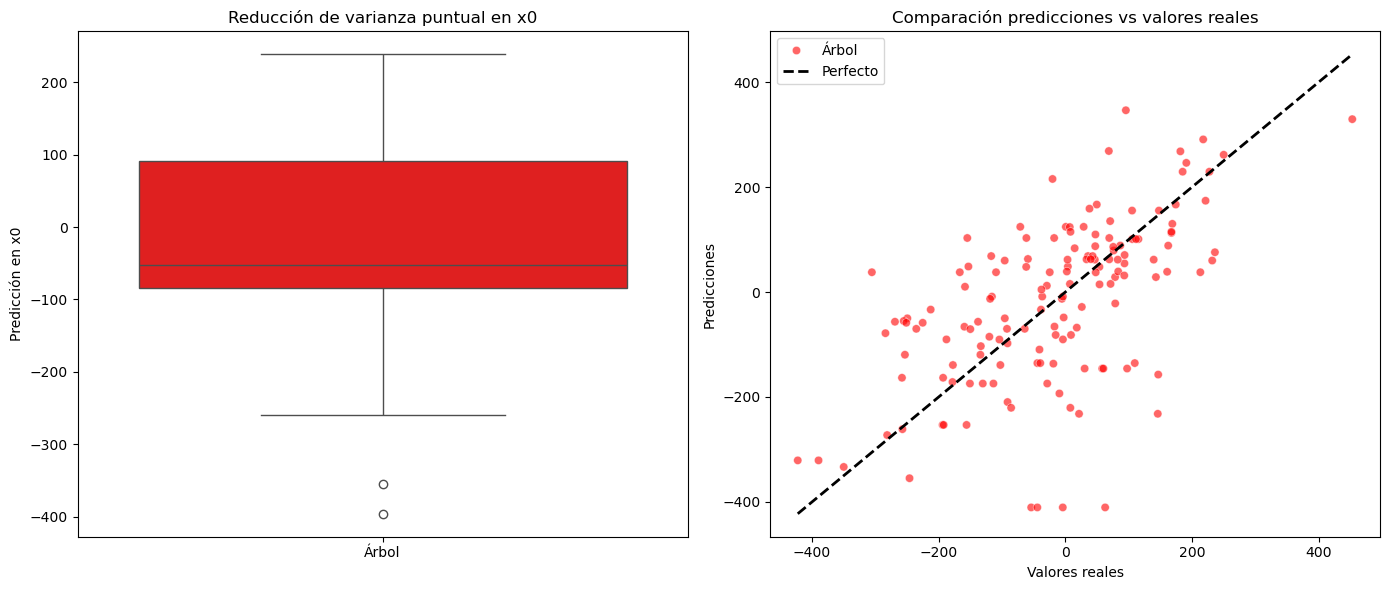

In [349]:
# Predicciones finales sobre X_test
# Predicciones en x0 (R repeticiones)
predicciones_x0 = [f_tree]

# Predicciones finales sobre X_test
y_preds = [tree.predict(X_test)]

etiquetas = ['Árbol']

colors = ['red']

varianza_en_predicciones(predicciones_x0, y_test, y_preds, etiquetas, palette_dict={'Árbol':'red'})

#### Bagging usando sklearn

Demostración puntual: estimando p

In [340]:
f_bag = []
for _ in range(R):
    bag = BaggingRegressor(DecisionTreeRegressor(), n_estimators=B, bootstrap=True)
    bag.fit(X_train, y_train)
    f_bag.append(np.mean([est.predict(x0)[0] for est in bag.estimators_]))
var_bag = np.var(f_bag, ddof=1)

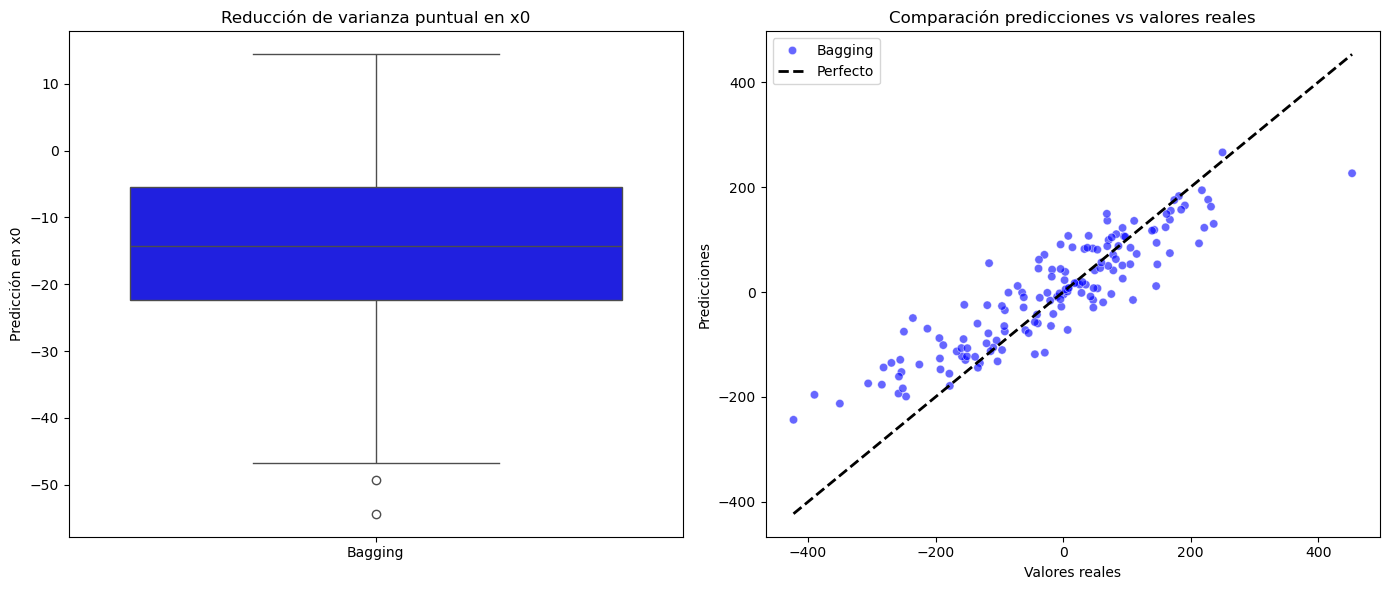

In [350]:
# Predicciones finales sobre X_test
# Predicciones en x0 (R repeticiones)
predicciones_x0 = [f_bag]

# Predicciones finales sobre X_test
y_preds = [bag.predict(X_test)]

etiquetas = ['Bagging']

varianza_en_predicciones(predicciones_x0, y_test, y_preds, etiquetas, palette_dict={'Bagging':'Blue'})

#### Random Forest:

In [342]:
f_rf = []
for _ in range(R):
    rf = RandomForestRegressor(n_estimators=B, bootstrap=True)
    rf.fit(X_train, y_train)
    f_rf.append(np.mean([est.predict(x0)[0] for est in rf.estimators_]))
var_rf = np.var(f_rf, ddof=1)

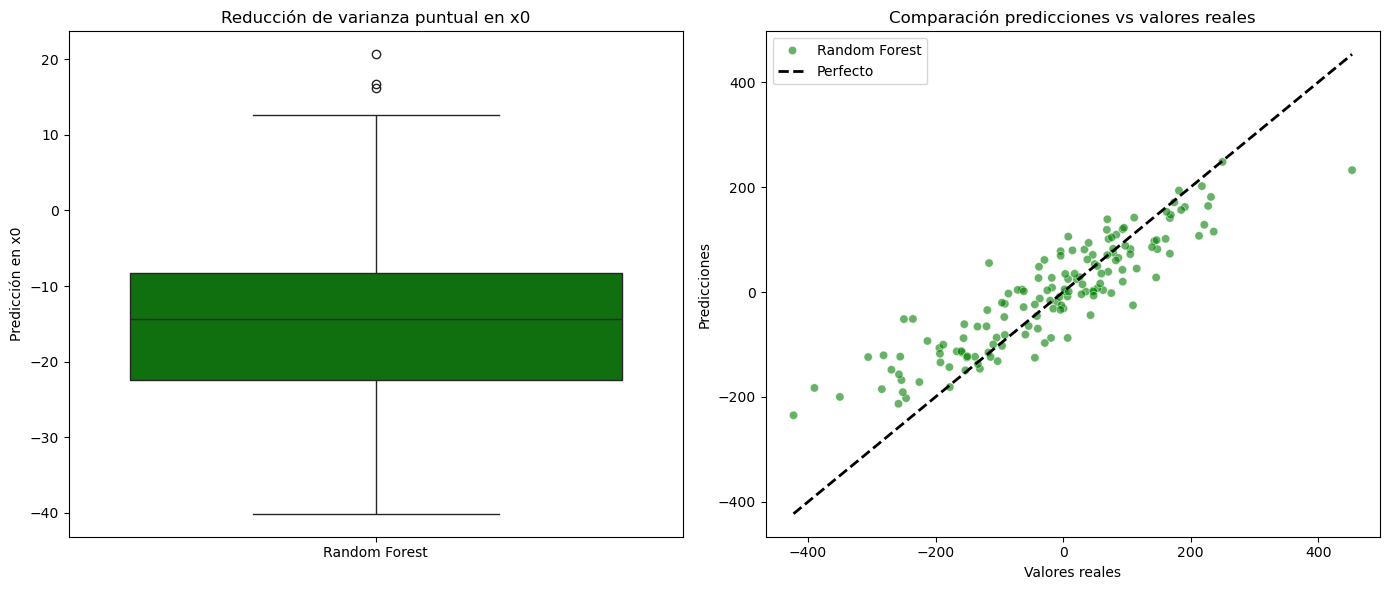

In [351]:
# Predicciones finales sobre X_test
# Predicciones en x0 (R repeticiones)
predicciones_x0 = [f_rf]

# Predicciones finales sobre X_test
y_preds = [rf.predict(X_test)]

etiquetas = ['Random Forest']

varianza_en_predicciones(predicciones_x0, y_test, y_preds, etiquetas, palette_dict={'Random Forest':'Green'})

### Conclusión

In [344]:
print(f"Varianza árbol individual: {var_tree:.2f}")
print(f"Varianza Bagging: {var_bag:.2f}")
print(f"Varianza Random Forest: {var_rf:.2f}")

Varianza árbol individual: 15388.66
Varianza Bagging: 151.72
Varianza Random Forest: 130.17


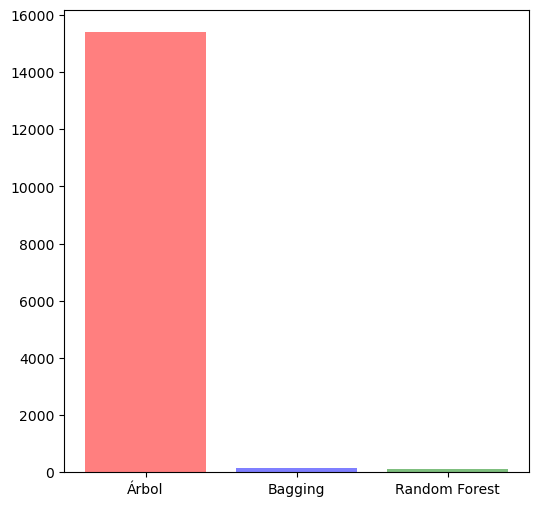

In [352]:
fig = plt.figure(figsize=(6, 6))
ax = plt.axes()

ax.bar(['Árbol', 'Bagging', 'Random Forest'], height=[var_tree, var_bag, var_rf], color=['red', 'blue', 'green'], alpha=0.5)
plt.show()

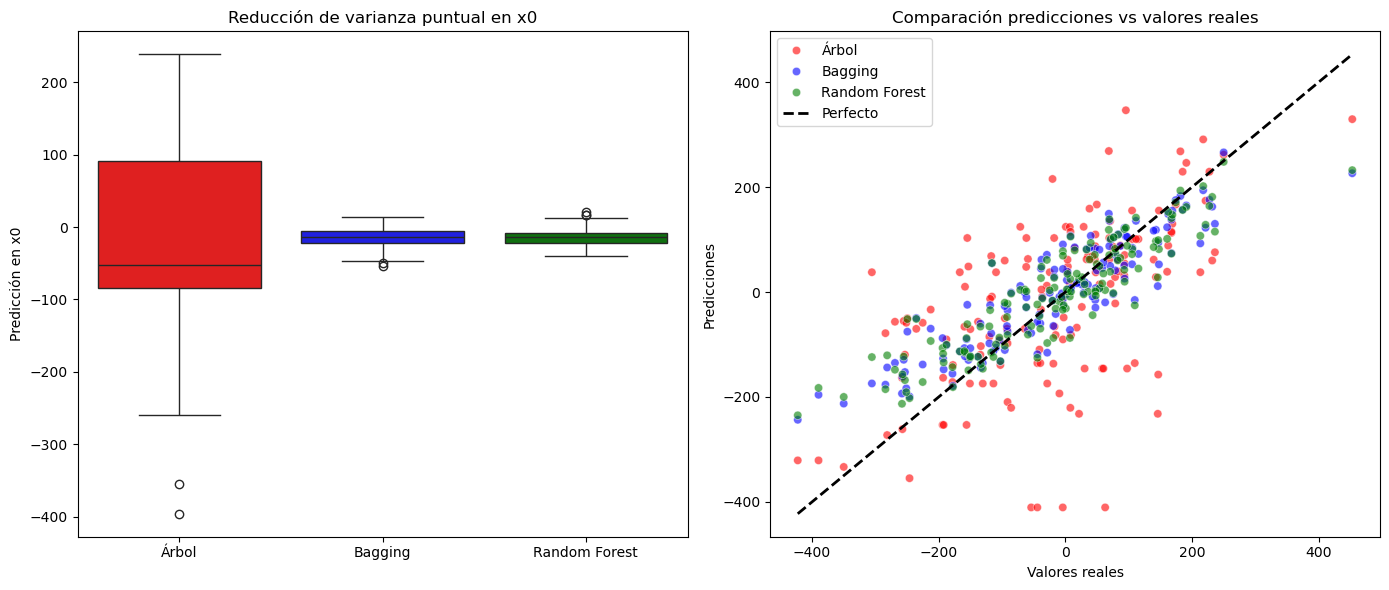

In [353]:
# Predicciones finales sobre X_test
# Predicciones en x0 (R repeticiones)
predicciones_x0 = [f_tree, f_bag, f_rf]

# Predicciones finales sobre X_test
y_preds = [tree.predict(X_test), 
           bag.predict(X_test), 
           rf.predict(X_test)]

etiquetas = ['Árbol', 'Bagging', 'Random Forest']

varianza_en_predicciones(predicciones_x0, y_test, y_preds, etiquetas)

* Varianza árbol individual → alta, mostrando que un solo árbol tiene gran varianza.
* Varianza Bagging → menor que la del árbol, porque promedia múltiples árboles bootstrap, reduciendo varianza por 1/B y cierta correlación.
* Varianza Random Forest → aún menor, porque además de bootstrap, introduce aleatoriedad en la selección de variables, reduciendo la correlación entre árboles (\rho) y por tanto la varianza final.